In [1]:
%load_ext autoreload
%autoreload 2

# Import Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import ast

In [171]:
df = pd.read_csv('../bpideep/rawdata/complete_df.csv').drop_duplicates(subset='id', keep='last')

# Explore


## Data clean

In [2]:
from bpideep.cleaning import clean_data

In [3]:
from bpideep.cleaning import get_data,clean_data

In [5]:
data = get_data()

In [4]:
data_clean = clean_data(data)

NameError: name 'data' is not defined

## Explore Industries

In [269]:
extract_json(data.industries).head()

""


In [275]:
data.industries[0]

"[{'id': 1254, 'name': 'health'}, {'id': 1264, 'name': 'fintech'}]"

## Explore kpi_summary

In [316]:
type(data.kpi_summary[0]) is str

True

In [318]:
s = ast.literal_eval(data.kpi_summary[0])
type(s) is dict

True

In [325]:
kpi_df = extract_json(data.kpi_summary)

,currency,last_update_date,last_update_date_utc,valuations,values,values_sources
id,,,,,,
1782186,None,2019-09-17T02:29:55+0100,2019-09-17 01:29:55,[],[],[]
125243,EUR,2020-07-31T10:34:23+0100,2020-07-31 09:34:23,"[{'id': 352523, 'year': 2019, 'month': 2, 'sou...",[],[]
322106,None,2020-07-31T10:29:51+0100,2020-07-31 09:29:51,"[{'id': 1006235, 'year': 2019, 'month': 10, 's...",[],[]
7092,None,2020-07-31T10:29:51+0100,2020-07-31 09:29:51,"[{'id': 167170, 'year': 2016, 'month': 7, 'sou...",[],[]
98420,None,2020-07-31T10:29:23+0100,2020-07-31 09:29:23,"[{'id': 151215, 'year': 2016, 'month': 4, 'sou...",[],[]


In [329]:
extract_json(kpi_df['valuations']).sort_values('valuation_max', ascending = False).head()

,market_cap,market_cap_currency,month,source,source_round,valuation,valuation_currency,valuation_max,valuation_min,year
id,,,,,,,,,,
201747,None,None,7.0,funding,SERIES A,NaN,EUR,282000000.0,188000000.0,2018
197727,None,None,5.0,funding,SERIES B,NaN,USD,225000000.0,150000000.0,2018
144332,None,None,9.0,funding,SERIES A,NaN,USD,210000000.0,140000000.0,2015
142781,None,None,4.0,funding,SERIES A,NaN,EUR,192000000.0,128000000.0,2013
167415,None,None,1.0,funding,SERIES B,NaN,USD,180000000.0,120000000.0,2008


In [332]:
data.id == 201747

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
425    False
426    False
427    False
428    False
429    False
430    False
431    False
432    False
433    False
434    False
435    False
436    False
437    False
438    False
439    False
440    False
441    False
442    False
443    False
444    False
445    False
446    False
447    False
448    False
449    False
450    False
451    False
452    False
453    False
454    False
Name: id, Length: 455, dtype: bool

In [333]:
data.loc[data.id == 201747, :]

,Unnamed: 0,about,achievements,alexa_rank_chart,angellist_url,app_12_months_growth_percentile,app_12_months_growth_relative,app_12_months_growth_unique,app_3_months_growth_percentile,app_3_months_growth_relative,...,total_funding,total_funding_source,traffic,traffic_summary,twitter_favorites_chart,twitter_followers_chart,twitter_tweets_chart,twitter_url,url,website_url


# Data Cleaning

## extract_json fonction

In [220]:
import ast
import pandas as pd
import numpy as np

def extract_json(column):  
    '''Extract a json form a column, return a data frame'''
    def to_dic(string):
        if type(string) is str:
            string = ast.literal_eval(string)
            if type(string) is dict:
                return string
            else : 
                try : 
                    return string[0]
                except:
                    return np.nan
      
        elif type(string) is list and string:
            return string[0]
        else: 
            return np.nan
        
    column = column.map(lambda x : to_dic(x))

    df = pd.DataFrame(column.dropna().to_list())
    
    return df 

## Encode hq_locations

In [47]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import ast

def zip_code():
    id_zip = pd.read_csv('../bpideep/rawdata/id_zip.csv', sep = ';')
    id_zip.set_index('id', inplace=True)
    data = pd.read_csv('../bpideep/rawdata/complete_df.csv').drop_duplicates(subset='id', keep='last')
    hq_locations = data[['id', 'hq_locations']]

    def to_dic(string):
        if string == '[]':
            return None
        else:
            string = ast.literal_eval(string)
            return string[0]

    hq_locations['list'] = hq_locations['hq_locations'].apply(lambda x : to_dic(x))
    hq_locations = hq_locations.dropna(axis=0, subset=['list']).drop('hq_locations', axis = 1)
    hq_df = pd.DataFrame(hq_locations['list'].to_list(), index=hq_locations['id'])
    hq_df = hq_df[['zip']]

    merged = hq_df.join(id_zip).fillna(value = -1000)
    merged_clean = merged

    def convert(string):
        try:
            int(string)
            n = string[0:2]
            n = int(n)      
        except:
            n = -1000
        return n 

    merged_clean.zip = merged_clean.zip.apply(lambda x : convert(x))

    merged_clean.ZIP = merged_clean.ZIP.apply(lambda x : int(str(x)[0:2] if x != 0 else 0))

    merged_clean['zip_code'] = merged_clean.apply(max, axis = 1)

    final = merged_clean.drop(columns=['zip', 'ZIP'])
    df = data[['id','target']].set_index('id').join(final, how = 'left').fillna(value = -1).astype('int') 
    
    return df

def zip_encoder(df):
    imputer = SimpleImputer(strategy='most_frequent', missing_values=-1000).fit(df[['zip_code']])
    df['zip_imputed'] = imputer.transform(df[['zip_code']])
    df.drop(columns='zip_code', inplace=True)

    encode_zip = pd.get_dummies(df.zip_imputed)
    return  encode_zip


In [56]:
zips  = zip_code_encoder()

c:\users\alexa\.venvs\lewagon\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
zip_encoder(zips)

,-1,4,6,10,11,13,14,17,20,21,22,25,26,27,29,30,31,33,34,35,37,38,39,40,41,42,44,45,46,49,50,51,53,54,56,57,59,60,61,62,63,64,65,66,67,68,69,73,74,75,76,77,78,80,81,82,83,84,85,86,87,91,92,93,94,95,97
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10427,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
15150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16327,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17943,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
zips.zip_code.value_counts()

 75    198
-1      73
 69     63
 92     48
 38     42
 91     33
 35     29
 31     27
 34     24
 13     22
 94     21
 59     18
 33     16
 44     15
 67     14
 87     11
 14     10
 63      9
 65      8
 78      8
 93      8
 64      7
 60      6
 21      5
 54      5
 77      4
 62      4
 25      4
 73      4
 74      4
      ... 
 61      3
 95      3
 49      2
 26      2
 22      2
 20      2
 27      2
 6       2
 42      2
 76      2
 11      1
 10      1
 85      1
 17      1
 84      1
 4       1
 86      1
 56      1
 46      1
 30      1
 82      1
 53      1
 80      1
 51      1
 50      1
 39      1
 40      1
 41      1
 45      1
 97      1
Name: zip_code, Length: 67, dtype: int64

In [52]:
zips.groupby('zip_code').mean().sort_values('target', ascending = False)

,target
zip_code,
45,1.000000
39,1.000000
41,1.000000
61,1.000000
42,1.000000
82,1.000000
74,1.000000
46,1.000000
49,1.000000


# Bulk Search

In [421]:
from bpideep.getdata import bulk_search

In [ ]:
requests.post(
    url="https://api.dealroom.co/api/v1/companies/bulk",
    data={
      "form_data": {
        "must": {
          "last_updated": "2020-08-22 00:00:00"
        }
      },
      "fields": "id,name",
      "next_page_id': "",
      "limit": 100
    },
    headers={
      "Content-Type": "application/json"
    },
    auth=HTTPBasicAuth(API_KEY, "")
)

In [422]:
df = bulk_search( form_data =  {
                            "must": {"last_round_year": "2019","hq_locations": "France"},
                            "must_not": {},
                            "should": {}
                            })

In [425]:
df.shape

(10, 11)

In [ ]:
df = bulk_search( form_data = {"must": {"last_round_year": "2019","hq_locations": "France"} } )

In [426]:
df.head()

,employees,growth_stage,hq_locations,id,images,last_updated,name,path,tagline,total_funding,traffic_summary
0,2-10,seed,"[{'id': 28513, 'address': 'United States, Prov...",80984,{'32x32': 'https://s3-eu-west-1.amazonaws.com/...,2020-07-22T11:53:17+0100,Sitefly,sitefly,The fastest way to create your website.,0.16,0.9K
1,11-50,early growth,"[{'id': 28542, 'address': 'United States, Wauc...",81013,{'32x32': 'https://s3.eu-west-2.amazonaws.com/...,2020-07-22T11:53:17+0100,SenseHere Technology,sensehere_technology,Sensehere Technology develops ultra-low power ...,0.00,None
2,2-10,seed,"[{'id': 28598, 'address': 'United States', 'st...",81070,{'32x32': 'https://s3-eu-west-1.amazonaws.com/...,2020-07-22T11:53:18+0100,Amigo da Cultura,amigo_da_cultura,Social network that allows entertainment busin...,0.05,None
3,11-50,mature,"[{'id': 28688, 'address': 'United States, Long...",81161,{'32x32': 'https://s3.eu-west-2.amazonaws.com/...,2020-07-22T11:53:18+0100,Sanders Industries,sanders_industries,Integrated Polymers Group,0.00,None
4,2-10,seed,"[{'id': 28741, 'address': 'United States, Seat...",81215,{'32x32': 'https://s3-eu-west-1.amazonaws.com/...,2020-07-22T11:53:18+0100,Vendaria,vendaria,Digital merchandising tools and services for m...,6.73,3K


In [104]:
bulk_search(keyword = "Dealroom", form_data = {
      "must": {
        "last_updated": "2016-12-10 00:00:00",
        "industries": ["fintech"],
        "tags": ["banking", "investing"],
        "hq_locations": ["Europe", "United States"]
      },
      "should": {
        "fundings": ["1-10M"]
      },
      "must_not": {
        "client_focus": ["consumer"]
      }
  })

{'error': True, 'code': 17, 'message': 'Invalid form data format'}

# INPI Api

In [224]:
import requests

In [137]:
data = pd.read_csv('../bpideep/rawdata/data.csv').drop_duplicates(subset='id', keep='last')[['id','name','target']]

In [140]:
data.shape

(1028, 3)

In [144]:
def ratio_target(data):
    t = data_df.loc[data_df['target'] == 0, 'target'].count()/data_df.loc[data_df['target'] == 1, 'target'].count()
    return t

In [155]:
data['name'] = data['name'].str.replace(':','')
def get_nb_brevets(col_name):
    def request_brevets(company):
        URL = f'https://data.enseignementsup-recherche.gouv.fr/api/records/1.0/search/?dataset=fr-esr-brevets-france-inpi-oeb&q={company}&rows=100&facet=annees_publication&facet=annees_delivrance&facet=num_siren&facet=secteur&facet=type&facet=etab&facet=domaine_technologique&facet=sous_domaine_technologique&facet=nom&facet=brev_de&facet=de_libelle&facet=fe_id'
        r = requests.get(URL)
        json =  r.json()
        try :
            b = json['nhits']
        except:
            b = None
        return b
    
    lst = []
    for name in col_name:
        lst.append(request_brevets(name))
    return lst

data['nb_brevets'] = get_nb_brevets(data.name)

In [168]:
data.sort_values('nb_brevets', ascending=False)

,id,name,target,nb_brevets
805,1464724,In&motion,0,63062
830,894802,Occi,0,16404
942,894849,Gema,0,1061
395,1481199,Sim&Cure,1,384
981,1836131,Neop,0,315
857,1450558,Bloc in Bloc,0,262
50,1249456,Avril,1,122
1002,919637,Alg & You,0,65
84,892999,Cellectis,1,62
44,972999,Armor,1,59


In [165]:
data[['nb_brevets']].loc[(data['nb_brevets'] > 0) & (data['target'] == 0)]['nb_brevets'].unique()

array([    1,     8,     4,     9,     7,    18,     6, 63062,     2,
           3, 16404,    14,   262,    16,    20,  1061,   315,    65],
      dtype=int64)

## Explore teams for patent


In [182]:
import ast

In [197]:
afyren_team = df.loc[df['id'] == 1598607, 'team']

In [205]:
team_list = ast.literal_eval(dict(afyren_team)[2])['items']

In [212]:
team_list[0]['name']

'Jérémy Pessiot'

In [213]:
team_member = []
for d in team_list:
    team_member.append(d['name'])

In [214]:
team_member

['Jérémy Pessiot', 'Maxime Cordonnier', 'Nicolas Sordet']

In [193]:
afyren_team

2    {'items': [{'id': 1598841, 'name': 'Jérémy Pes...
Name: team, dtype: object

## Api vol 2

In [186]:
import requests

In [188]:
def get_nb_brevets(col_name):
    col_name = col_name.str.replace(':','').str.replace('.com','').str.replace('.fr','')
    def request_brevets(company):
        URL = 'https://data.enseignementsup-recherche.gouv.fr/api/records/1.0/search/?'
        
        r = requests.get(URL,params = {'dataset' : 'fr-esr-brevets-france-inpi-oeb',
                           'q' : f'#exact(nom, {company})',
                          'fields' : ['nom']})
        json =  r.json()
        try :
            b = json['nhits']
        except:
            b = None
        return b
    
    lst = []
    for name in col_name:
        lst.append(request_brevets(name))
    return lst

data['inpi_brevets'] = get_nb_brevets(data.name)

# Brevets excel

Pas matchable sans SIREN

In [226]:
import pandas as pd

In [229]:
brevets = pd.read_csv('../bpideep/rawdata/brevets.csv').drop(columns=['Unnamed: 0', 'applicationDate'])

In [235]:
data = pd.read_csv('../bpideep/rawdata/complete_df.csv').drop_duplicates(subset='id', keep='last')[['id','name','target']]

# Brevets Big Query

In [7]:
import pandas as pd

In [13]:
from bpideep.getpatent import get_patents, test_patents

In [8]:
data = pd.read_csv('../bpideep/rawdata/data.csv').drop_duplicates(subset='id', keep='last')[['id','name','target']]

In [24]:
import pandas as pd
from google.cloud import bigquery

#variables
gcp_project = 'gold-hybrid-288409'
bq_dataset = 'bpius'

#connections
client = bigquery.Client()
# dataset_ref = client.dataset(bq_dataset)

def test_patents():
    # gcp_project = 'gold-hybrid-288409'
    # bq_dataset = 'bpius'

    # #connections
    # client = bigquery.Client(project=gcp_project)
    # dataset_ref = client.dataset(bq_dataset)

    sql = '''SELECT publication_number,assignee FROM `patents-public-data.patents.publications_202004`
            WHERE '4P Pharma' in UNNEST(assignee)'''

    query = client.query(sql)
    results = query.result()
    return query

In [40]:
ex = pd.DataFrame(columns=['id','name'])

## Function get patents

In [73]:
ex2 = pd.DataFrame.from_dict({"id":[1],"name":[2]})

In [83]:
def get_patents335353(data):
    df = pd.DataFrame(columns=["id","id_patents","assignee"])
    for i in data.index:
        name = data.loc[i,'name'].cap
        ids = data.loc[i,'id']
        sql = f'SELECT publication_number,assignee FROM `patents-public-data.patents.publications_202004` WHERE "{name}" in UNNEST(assignee) LIMIT 50 ;'
        query = client.query(sql)
        results = query.result()
        r_dic = {'id':[], 'id_patents': [], 'assignee':[]}
        for row in results:
            r_dic['id'].append(ids)
            r_dic['id_patents'].append(row[0])
            r_dic['assignee'].append(row[1])
            
        r_df = pd.DataFrame.from_dict(r_dic)
        df = pd.concat([df,r_df])
        
    return df


In [84]:
patents_df = get_patents(data[0:30])

In [85]:
patents_df 

,id,id_patents,assignee
0,1743314,IL-255550-D0,[4P Pharma]
1,1743314,ZA-201707734-B,[4P Pharma]
0,1660138,WO-2019175378-A1,[Acklio]
1,1660138,WO-2018178242-A1,[Acklio]
2,1660138,WO-2019175276-A1,[Acklio]
3,1660138,WO-2019175275-A1,[Acklio]
4,1660138,EP-3541040-A1,[Acklio]
5,1660138,EP-3541041-A1,[Acklio]
6,1660138,EP-3603000-A1,[Acklio]
7,1660138,FR-3064865-A1,[Acklio]


## get number of patent from BQ

In [217]:
'id' and 'name' in merged.columns

True

In [86]:
res = patents_df.merge(data, on = 'id', how = 'left')

In [236]:
def get_nb_patents(data):
    ''' get number of patents on Big Query by name of companies. Takes a df with col=['name','id']'''
    
    if 'name' and 'id' not in data.columns:
        return print('get_patents needs columns name and id in the input dataframe')
    
    df = pd.DataFrame(columns=["id","n_brevets"])
    
    def query(name):
        sql = f'SELECT COUNT(*) FROM `patents-public-data.patents.publications_202004` WHERE "{name}" in UNNEST(assignee) ;'
        query = client.query(sql)
        results = query.result()
        return results
        
    for i in data.index:
        name = data.loc[i,'name']
        ids = data.loc[i,'id']
        
        results = query(name)
        
#         if results.total_rows == 0:
#             name = name.capitalize()
#             results = query(name)
            
        r_dic = {'id':[], 'n_brevets':[]}
        for row in results:
            r_dic['id'].append(ids)
            r_dic['n_brevets'].append(row[0])
            
        r_df = pd.DataFrame.from_dict(r_dic)
        df = pd.concat([df,r_df], ignore_index = True)
        
    return df

In [137]:
data['name'] = data['name'].str.replace('www.','').str.replace('.com','').str.replace('.com','').str.replace('.fr','')

In [141]:
patents_df = get_patents(data)

In [146]:
patents_df.sort_values('n_brevets', ascending = False)

,id,n_brevets
401,1479773,1284
84,892999,1022
374,214127,583
23,10427,426
494,901183,325
502,213056,315
118,30708,232
532,212924,211
348,213425,165
482,73598,161


In [147]:
merged = data.merge(patents_df, on = 'id', how = 'left')

## Visual Exploration of Patents

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
merged.loc[merged.target == 1, 'n_brevets'].mean()

12.708474576271186

In [156]:
merged.loc[merged.target == 0, 'n_brevets'].mean()

2.1073059360730593

### Plots

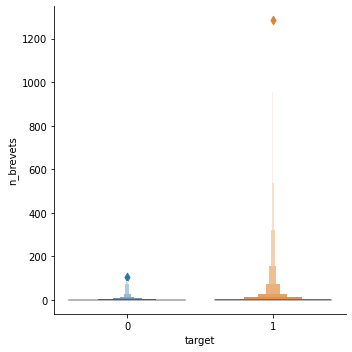

In [259]:
sns.catplot(x = 'target', y = 'n_brevets', data = merged, kind = 'boxen' )

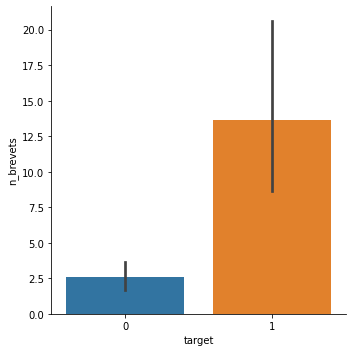

In [260]:
sns.catplot(x = 'target', y = 'n_brevets', data = merged_cp, kind = 'bar' )

### Distribution

In [172]:
import numpy as np

In [181]:
merged.pivot_table(values='n_brevets', index='target', aggfunc=[np.mean,np.median, np.max])

,mean,median,amax
,n_brevets,n_brevets,n_brevets
target,,,
0,2.107306,0,104
1,12.708475,0,1284


30% des deeptechs ont des brevets contre 19% des non deeptechs

In [201]:
merged.loc[(merged['n_brevets']>0) & (merged['target']==1),: ].count()/merged.loc[merged['target']==1,:].count()

id              0.308475
name            0.308475
target          0.308475
n_brevets       0.308475
inpi_brevets    0.308475
dtype: float64

In [202]:
merged.loc[(merged['n_brevets']>0) & (merged['target']==0),: ].count()/merged.loc[merged['target']==0,:].count()

id              0.196347
name            0.196347
target          0.196347
n_brevets       0.196347
inpi_brevets    0.196347
dtype: float64

In [205]:
merged.sort_values('n_brevets', ascending = False).head()

,id,name,target,n_brevets,inpi_brevets
401,1479773,Soitec,1,1284,0
84,892999,Cellectis,1,1022,62
374,214127,Genfit,1,583,0
23,10427,Aledia,1,426,0
494,901183,Mauna Kea Technologies,1,325,0


## Amélioration de get patents

Problème de la recherche par nom, il ya des types sur les noms des entreprises


In [206]:
merged.head()

,id,name,target,n_brevets,inpi_brevets
0,1742681,Healthcardionexion,1,0,0
1,1743314,4P Pharma,1,2,0
2,1598607,AFYREN,1,0,1
3,894817,Abbelight,1,0,0
4,1683057,AblaCare,1,0,0


In [222]:
missing = merged.loc[(merged['n_brevets'] == 0) & (merged['inpi_brevets'] > 0)]['name']

In [223]:
missing.str.isupper()

2        True
133      True
598      True
614     False
651      True
885      True
886      True
1013     True
Name: name, dtype: bool

### Relancer get_patents avec les uppercased cleaned

In [226]:
uppercase_df = merged.loc[merged.name.str.isupper(),:]

In [235]:
uppercase_df.head()

,id,name,target,inpi_brevets
2,1598607,Afyren,1,1
15,1478165,Apsi 3d,1,0
30,1768749,Alzohis,1,0
51,1834596,Aykow,1,0
57,1479918,Biomae,1,0


In [237]:
upp_brevets = get_nb_patents(uppercase_df)

In [254]:
merged_cp = merged.copy()

In [256]:
merged_cp.head()

,name,target,n_brevets,inpi_brevets
id,,,,
1742681,Healthcardionexion,1,0,0
1743314,4P Pharma,1,2,0
1598607,AFYREN,1,78,1
894817,Abbelight,1,0,0
1683057,AblaCare,1,0,0


### Metrics amélioration recherche get_patent

In [269]:
merged[merged.n_brevets >0]['name'].count()

268

In [270]:
merged_cp[merged_cp.n_brevets >0]['name'].count()

294

## get_patents avec harmonized names

In [272]:
merged_cp[(merged_cp.name.apply(lambda x : "'" in x))]

,name,target,n_brevets,inpi_brevets
id,,,,
1463646,In'Air Solutions,1,0,0
1660509,MATERR'UP,1,0,0
1678088,Nutri'Earth,1,0,0
1518870,Innov'ATM,1,0,0
1477870,LUMI'IN,0,1,0
1660559,O'Sol,0,0,0
1448149,Rool'in,0,5,0
1483464,Led's Chat,0,3,0
1836047,MOVIN'SMART,0,0,0


###  function harmonized_name 

In [273]:
def name_clean(column_name):
    '''Clean the name column for Big Query'''
    name_clean = column_name.str.replace('-', ' ').str.replace("'", '').str.upper()
    return name_clean

### Function get_patents with harmonized_name

In [320]:
def get_patents(data):
    df = pd.DataFrame(columns=['id', 'id_patents', 'country_code', 'harmonized_assignee', 'top_terms', 'nb_similar'])
    
    if 'clean_name' not in data.columns:
        return print('clean_name is not a column of the input dataFrame')
    
    for i in data.index:
        name = data.loc[i,'clean_name']
        ids = data.loc[i,'id']
        
        sql = ( 'SELECT patents.publication_number, patents.country_code, ARRAY(SELECT name FROM UNNEST(patents.assignee_harmonized)), ' 
                'google.top_terms, (SELECT COUNT(publication_number) FROM UNNEST(google.similar)) AS similar '
                'FROM `patents-public-data.patents.publications_202004` AS patents '
                'LEFT JOIN `patents-public-data.google_patents_research.publications_202004` AS google ON patents.publication_number = google.publication_number '
                f'WHERE "{name}" in UNNEST(ARRAY(SELECT name FROM UNNEST(patents.assignee_harmonized)))' ) 

        query = client.query(sql)
        results = query.result()
        
        r_dic = {'id':[], 'id_patents': [],'country_code':[],'harmonized_assignee':[],'top_terms':[],'nb_similar':[] }
        
        for row in results:
            r_dic['id'].append(ids)
            r_dic['id_patents'].append(row[0])
            r_dic['country_code'].append(row[1])
            r_dic['harmonized_assignee'].append(row[2])
            r_dic['top_terms'].append(row[3])
            r_dic['nb_similar'].append(row[4])
            
        r_df = pd.DataFrame.from_dict(r_dic)
        df = pd.concat([df,r_df])
    
    return df

In [310]:
data['clean_name'] = harmonized_name(data.name)

In [323]:
from bpideep.getpatent import get_patents

In [324]:
patents_df = get_patents(data)

In [325]:
patents_df.shape

(9369, 6)

In [326]:
patents_df.head()

,id,id_patents,country_code,harmonized_assignee,top_terms,nb_similar
0,1743314,AU-2016259861-A1,AU,[4P PHARMA],"[composition, apomorphine, layer, abuse deterr...",16
1,1743314,ZA-201707734-B,ZA,[4P PHARMA],"[deterrent compositions, stimulant abuse, stim...",25
2,1743314,IL-255550-D0,IL,[4P PHARMA],"[deterrent compositions, stimulant abuse, stim...",25
3,1743314,EP-3294278-A4,EP,[4P PHARMA],"[deterrent compositions, stimulant abuse, stim...",25
4,1743314,KR-20180012771-A,KR,[4P PHARMA],"[composition, abuse, apomorphine, layer, coate...",8


## Metrics de le recherche get_patents

In [343]:
data_with_patents = data.merge(patents_df, on = 'id', how = 'left') 

Number of companies without patents

In [346]:
data_with_patents.id_patents.isna().sum()

684

Number of companies with patents

In [350]:
data.shape[0] - 684

344

# Analyse des Brevets 

## Distribution of patents

,id,name,target,inpi_brevets,clean_name,id_patents,country_code,harmonized_assignee,top_terms,nb_similar
0,1742681,Healthcardionexion,1,0,HEALTHCARDIONEXION,NaN,NaN,NaN,NaN,NaN
1,1743314,4P Pharma,1,0,4P PHARMA,AU-2016259861-A1,AU,[4P PHARMA],"[composition, apomorphine, layer, abuse deterr...",16
2,1743314,4P Pharma,1,0,4P PHARMA,ZA-201707734-B,ZA,[4P PHARMA],"[deterrent compositions, stimulant abuse, stim...",25
3,1743314,4P Pharma,1,0,4P PHARMA,IL-255550-D0,IL,[4P PHARMA],"[deterrent compositions, stimulant abuse, stim...",25
4,1743314,4P Pharma,1,0,4P PHARMA,EP-3294278-A4,EP,[4P PHARMA],"[deterrent compositions, stimulant abuse, stim...",25


## Grouping by id

In [359]:
merged_patents.loc[merged_patents.id_patents.notna(),'nb_similar'].astype('int', inplace= True)

0       16
1       25
2       25
3       25
4        8
5       15
6       18
7        4
8        5
9        7
10       7
11       8
12      12
13       1
14       8
15      25
16       0
17       5
18      25
19       5
20       5
21       8
22       2
23      15
24      14
25       1
26       4
27       1
28      25
29      12
        ..
9339     1
9340    20
9341    19
9342     4
9343     2
9344     9
9345     2
9346     8
9347    25
9348     0
9349     5
9350     2
9351     8
9352     2
9353     2
9354     3
9355     1
9356    21
9357     4
9358    25
9359    25
9360    16
9361    15
9362    25
9363    25
9364    25
9365    16
9366    22
9367    25
9368    25
Name: nb_similar, Length: 9369, dtype: int32

In [363]:
type(merged_patents.loc[merged_patents.id_patents.notna(),'nb_similar'][1])

int

In [375]:
grouped_merged = merged_patents[merged_patents.id_patents.notna()][['id','nb_similar','target']].astype('int').groupby('id')

agg similar with functions 

In [378]:
agg_similar = grouped_merged.agg({'nb_similar':['count','mean','median','sum','min'],'target':'max'})

In [379]:
agg_similar.head()

nb_similar                             target
           count       mean median   sum min    max
id                                                 
3388         165  23.436364   25.0  3867   9      1
4347          60  15.533333   19.5   932   0      1
4452          51  21.823529   25.0  1113   6      0
13122         48  19.145833   20.0   919   6      1
15150         71  17.323944   18.0  1230   5      1

data viz similar between groups

In [388]:
plot_df = pd.concat([agg_similar['nb_similar'],agg_similar['target']], axis = 1)

### Plot : Comparaison des similars

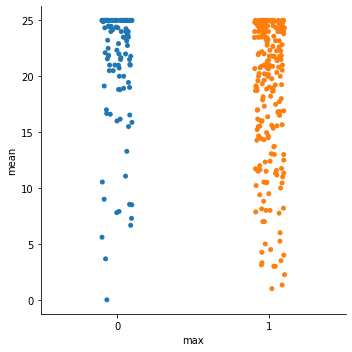

In [406]:

sns.catplot(x = 'max', y = 'mean', data = plot_df)

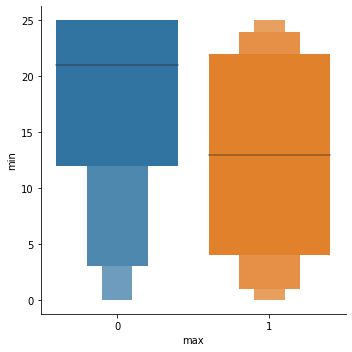

In [409]:
sns.catplot(x = 'max', y = 'min', data = plot_df, kind = 'boxen')

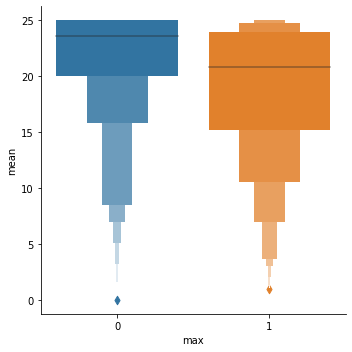

In [389]:
sns.catplot(x = 'max', y = 'mean', data = plot_df, kind = 'boxen' )

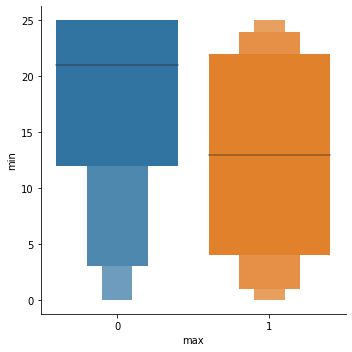

In [390]:
sns.catplot(x = 'max', y = 'min', data = plot_df, kind = 'boxen' )

Adding target to patents_df

In [330]:
merged_patents = patents_df.merge(data[['id','target']], on = 'id', how = 'left')

In [333]:
merged_patents.head()

,id,id_patents,country_code,harmonized_assignee,top_terms,nb_similar,target
0,1743314,AU-2016259861-A1,AU,[4P PHARMA],"[composition, apomorphine, layer, abuse deterr...",16,1
1,1743314,ZA-201707734-B,ZA,[4P PHARMA],"[deterrent compositions, stimulant abuse, stim...",25,1
2,1743314,IL-255550-D0,IL,[4P PHARMA],"[deterrent compositions, stimulant abuse, stim...",25,1
3,1743314,EP-3294278-A4,EP,[4P PHARMA],"[deterrent compositions, stimulant abuse, stim...",25,1
4,1743314,KR-20180012771-A,KR,[4P PHARMA],"[composition, abuse, apomorphine, layer, coate...",8,1


## Wordcloud top_terms

In [339]:
from wordcloud import WordCloud

In [340]:
wordcloud = WordCloud()

In [402]:
text_0 = ""
for lst in merged_patents[merged_patents.target == 0].top_terms:
    for word in lst:
        text_0 = text_0 + ' '+ word
    

wordcloud_0 = wordcloud.generate(text_0)

plt.imshow(wordcloud_0)

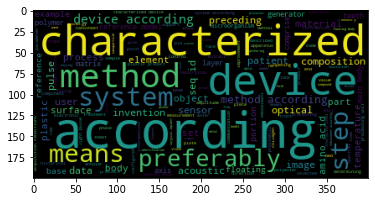

In [419]:
text_1 = ""
for lst in merged_patents[merged_patents.target == 0].top_terms:
    for word in lst:
        text_1 = text_1 + ' '+ word
    

wordcloud_1 = wordcloud.generate(text_1)

plt.imshow(wordcloud_1)